# AlexNet CIFAR-10 Classification
* Author: Ziad Tamim
* Description: Training AlexNet with CIFAR-10 Dataset. Loading data, building the Lenet achetiture using tensorflow, training the model, and evaluating its performance.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


2024-04-30 13:31:41.656755: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 13:31:41.656840: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 13:31:41.803300: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Loading Training and testing data (CIFAR-10)
* Loading the data
* Normalising pixle values

In [2]:
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Building the AlexNet architechture using tensorflow

In [3]:
def build_alexnet(input_shape=(32, 32, 3)):
    model = models.Sequential([
        # 1st Conv Layer
        layers.Conv2D(48, (3, 3), strides=1, activation='relu', input_shape=input_shape, padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        
        # 2nd Conv Layer
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        
        # 3rd Conv Layer
        layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
        
        # 4th Conv Layer
        layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
        
        # 5th Conv Layer
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=2),
        
        # Flattening the data for upcoming dense layers
        layers.Flatten(),
        
        # 1st Dense Layer
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        
        # 2nd Dense Layer
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        
        # Output Layer
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and compile the revised AlexNet model
model = build_alexnet()
model.summary()



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 48)     │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        55,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 192)      │       221,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 192)      │       331,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,014,410 (7.68 MB)

 Trainable params: 2,014,410 (7.68 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model
* 40 epochs
* 64 batch size

In [4]:
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_test, y_test))


Epoch 1/40
 18/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.1136 - loss: 2.3118  

I0000 00:00:1714483931.114797     106 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714483931.131575     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2556 - loss: 1.9537

W0000 00:00:1714483942.705951     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1714483943.949104     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.2557 - loss: 1.9534 - val_accuracy: 0.5181 - val_loss: 1.3430
Epoch 2/40
 22/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5037 - loss: 1.3233

W0000 00:00:1714483944.917432     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5279 - loss: 1.3042 - val_accuracy: 0.6177 - val_loss: 1.0734
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6238 - loss: 1.0664 - val_accuracy: 0.6703 - val_loss: 0.9353
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6923 - loss: 0.8870 - val_accuracy: 0.6889 - val_loss: 0.8853
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7256 - loss: 0.7917 - val_accuracy: 0.7345 - val_loss: 0.7736
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7597 - loss: 0.6862 - val_accuracy: 0.7299 - val_loss: 0.7922
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7895 - loss: 0.6128 - val_accuracy: 0.7412 - val_loss: 0.7757
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8096 - loss: 0.5551 - val_accuracy: 0.7528 - val_loss: 0.7561
Epoch 9/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8351 - loss: 0.4833 - val_accuracy: 0.7565 - val_

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


 77/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7546 - loss: 1.3181

W0000 00:00:1714484171.987263     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7524 - loss: 1.3856
Test accuracy: 0.7523000240325928


## Visualising Training Accuracy and Loss

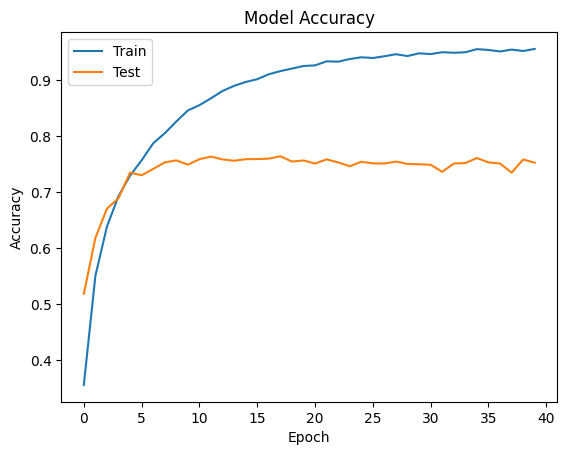

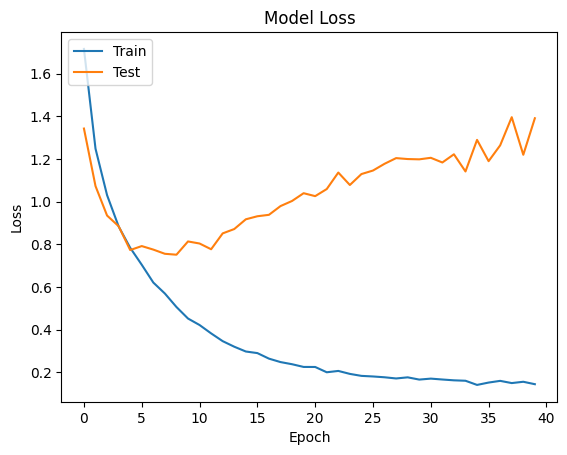

In [6]:
import matplotlib.pyplot as plt
# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Evaluaing the model using confusion matrix and classification report

 92/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1714484174.764955     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1714484175.687992     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


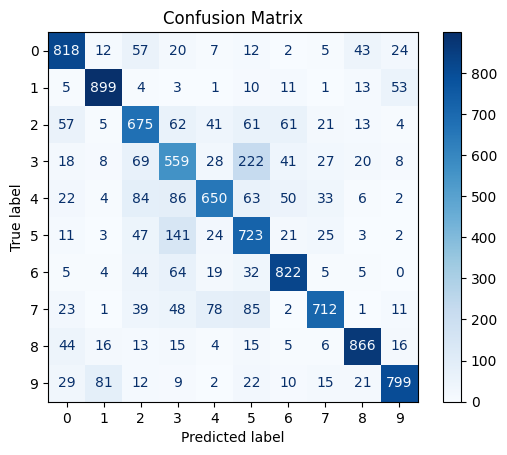

Classification Report:
               precision    recall  f1-score   support

           0     0.7926    0.8180    0.8051      1000
           1     0.8703    0.8990    0.8844      1000
           2     0.6466    0.6750    0.6605      1000
           3     0.5551    0.5590    0.5571      1000
           4     0.7611    0.6500    0.7012      1000
           5     0.5807    0.7230    0.6441      1000
           6     0.8020    0.8220    0.8119      1000
           7     0.8376    0.7120    0.7697      1000
           8     0.8739    0.8660    0.8699      1000
           9     0.8694    0.7990    0.8327      1000

    accuracy                         0.7523     10000
   macro avg     0.7589    0.7523    0.7537     10000
weighted avg     0.7589    0.7523    0.7537     10000



In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Predictions for the test set
prediction_scores = model.predict(x_test)
predicted_labels = np.argmax(prediction_scores, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, predicted_labels, digits=4)
print('Classification Report:\n', report)

## Inference on a single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


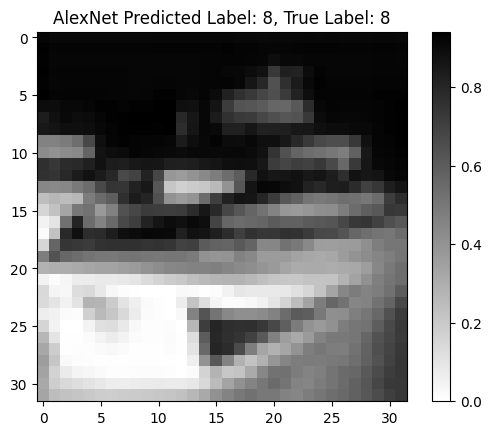

In [8]:
# Inference on a single image
img_index = 1
selected_image = x_test[img_index]
selected_label = y_test[img_index]
image_for_inference = np.expand_dims(selected_image, 0)
predictions = model.predict(image_for_inference)
predicted_label = np.argmax(predictions)

# Display the image
plt.figure()
plt.imshow(selected_image[:, :, 0], cmap=plt.cm.binary)
plt.title(f'AlexNet Predicted Label: {predicted_label}, True Label: {selected_label}')
plt.colorbar()
plt.grid(False)
plt.show()